In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import load_config
import yfinance as yf
import numpy as np
from src.logger import logger


class Var:
    def __init__(self,config):
        self.config = config
        self.stock_data = None
        self.returns = None
        self.var = None
        self.cvar = None

        
    def load_data(self):
        """
        Loads in data from yfinance
        """
        self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.stock_data = self.stock_data.dropna()
        return self.stock_data
    
    def get_returns(self):
        if self.stock_data is None:
            self.load_data()
            
        self.returns = self.stock_data.pct_change().dropna()
        return self.returns
    
    def get_var(self,ci=0.95):
        """
        value at risk
        """
        if self.stock_data is None:
            self.load_data()

        self.value_at_risk = np.percentile(self.returns,(1 - ci)*100)
        return self.value_at_risk
    
    def get_cvar(self,ci=0.95):
        """
        Conditional Value at Risk
        """
        if self.stock_data is None:
            self.load_data()


        tail_risk = self.returns[self.returns < self.value_at_risk]
        self.cvar = np.mean(tail_risk)
        return self.cvar
    
    def plot_returns(self):
        """
        Args:
          plots VaR, Returns, and cvar
          """
        if self.stock_data is None:
            self.load_data()
        print(f' Returns: {self.returns}')
        print(f'Value at Risk: {self.value_at_risk}')
        print(f'Conditional Value at Risk: {self.cvar:.4}%')
        plt.figure(figsize=(10, 6))
        plt.hist(self.returns, bins=100, label="Returns Distribution", alpha=0.7)
        plt.axvline(self.value_at_risk, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {self.value_at_risk:.4f}')
        plt.axvline(x=self.cvar, color='green', linestyle='--', label=f'CVaR ({self.cvar:.4f}%)')
        plt.title('Distribution of Returns and Value at Risk')
        plt.xlabel('Returns')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()


In [2]:
if __name__ == "__main__":
    config = load_config()
    var_config = Var(config)
    var_config.load_data()


/tmp/ipykernel_8372/3633724179.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.stock_data = yf.download(self.config['stock_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  10 of 10 completed


In [3]:
var_config.get_returns()

Ticker,AAPL,F,GM,GOOGL,MCD,MSFT,SBUX,TGT,TSLA,WMT
Date,,,,,,,,,,
2020-10-13,-0.026527,0.011734,-0.010556,0.001585,0.005484,0.006594,-0.006830,0.006502,0.009835,0.013726
2020-10-14,0.000743,-0.024484,-0.006275,-0.002317,0.001187,-0.008974,-0.009428,-0.010082,0.032800,-0.015660
2020-10-15,-0.003961,0.006605,0.029050,-0.005098,0.008875,-0.005433,-0.005374,0.009087,-0.026924,0.004099
2020-10-16,-0.014001,0.006562,0.026388,0.007863,-0.001176,0.000000,-0.003490,-0.003264,-0.020518,0.001246
2020-10-19,-0.025542,-0.010430,-0.002989,-0.024080,-0.014692,-0.024766,-0.010393,-0.005275,-0.020106,-0.012162
...,...,...,...,...,...,...,...,...,...,...
2025-08-25,-0.002634,0.006814,-0.001542,0.011645,-0.002006,-0.005855,-0.029079,-0.021262,0.019382,-0.007849
2025-08-26,0.009465,0.001692,0.008922,-0.006475,-0.001595,-0.004402,0.009556,-0.010501,0.014628,-0.000208
2025-08-27,0.005146,0.005912,-0.000850,0.001641,-0.004825,0.009362,0.011890,0.019249,-0.005886,0.000312


In [4]:
var_config.get_var()

np.float64(-0.03220603304381544)

In [5]:
var_config.get_cvar()

np.float64(-0.0502492120304577)

 Returns: Ticker          AAPL         F        GM     GOOGL       MCD      MSFT  \
Date                                                                     
2020-10-13 -0.026527  0.011734 -0.010556  0.001585  0.005484  0.006594   
2020-10-14  0.000743 -0.024484 -0.006275 -0.002317  0.001187 -0.008974   
2020-10-15 -0.003961  0.006605  0.029050 -0.005098  0.008875 -0.005433   
2020-10-16 -0.014001  0.006562  0.026388  0.007863 -0.001176  0.000000   
2020-10-19 -0.025542 -0.010430 -0.002989 -0.024080 -0.014692 -0.024766   
...              ...       ...       ...       ...       ...       ...   
2025-08-25 -0.002634  0.006814 -0.001542  0.011645 -0.002006 -0.005855   
2025-08-26  0.009465  0.001692  0.008922 -0.006475 -0.001595 -0.004402   
2025-08-27  0.005146  0.005912 -0.000850  0.001641 -0.004825  0.009362   
2025-08-28  0.008981 -0.016793 -0.004426  0.020050  0.002537  0.005723   
2025-08-29 -0.001806  0.005124  0.001710  0.006001  0.004228 -0.005788   

Ticker          SBUX       

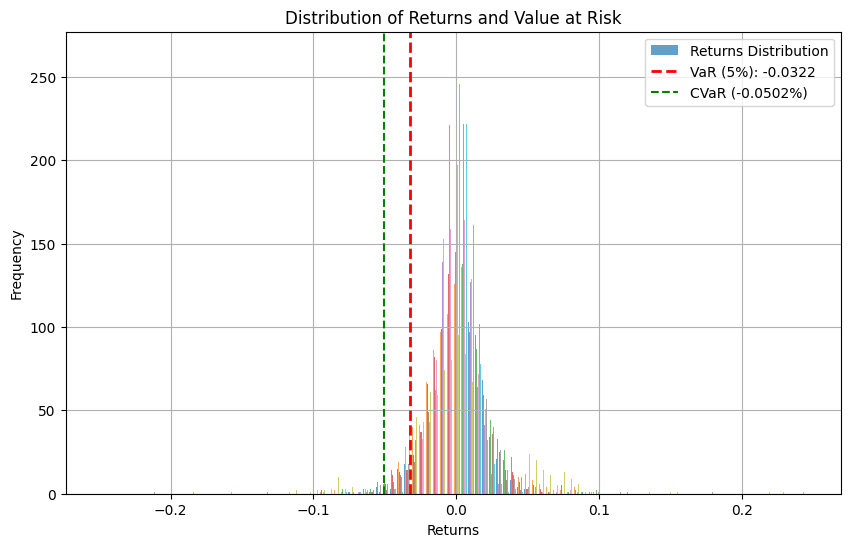

In [6]:
var_config.plot_returns()